In [1]:
import pandas as pd 
import numpy as np 


In [2]:
# Impoering the data 
ipl = pd.read_csv('C:/Users/asehg/Desktop/Games/ipl.csv')

In [4]:
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [10]:
ipl.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [12]:
# Data cleaning 
# selecting unncessary features
remove_col = [ 'mid','venue',  'batsman', 'bowler', 'striker','non-striker']

In [13]:
ipl.drop( labels = remove_col , axis =1 , inplace = True)
ipl.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [14]:
teams_in_2021 = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [16]:
# selectiong only those team which are playing in 2021 season 
ipl = ipl[(ipl['bat_team'].isin(teams_in_2021)) & (ipl['bowl_team'].isin(teams_in_2021))]

In [17]:
# removing first 5 over data from matcheds 
ipl = ipl[ipl['overs']>=5.0]

In [18]:
ipl.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [21]:
print(type(ipl.date))
# coverting date( string ) coloumn into datetime format 
from datetime import datetime
ipl['date'] = ipl['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
print(type(ipl.date))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [23]:
# creating dummy variables for catagorical varbales 
catagorical_ipl = ['bat_team', 'bowl_team']
ipl = pd.get_dummies(data=ipl, columns = catagorical_ipl)

In [24]:
ipl.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
# splittiong data into test and train based upon time
X_train = ipl.drop(labels='total', axis=1)[ipl['date'].dt.year <= 2016]
X_test = ipl.drop(labels='total', axis=1)[ipl['date'].dt.year >= 2017]

In [27]:

y_train = ipl[ipl['date'].dt.year <= 2016]['total'].values
y_test = ipl[ipl['date'].dt.year >= 2017]['total'].values

In [28]:
# Droping the date and time column 
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)


<bound method BaseEstimator.set_params of LinearRegression()>
<bound method BaseEstimator.set_params of LinearRegression()>


In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [34]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

C:\Users\asehg\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.82776e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\asehg\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.47066e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\asehg\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.49926e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\asehg\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.43178e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\asehg\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.56364e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\asehg\Anaconda3\lib\site-packages\sklearn\linear_mo

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [35]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-328.41527924879244


In [36]:
prediction=ridge_regressor.predict(X_test)

C:\Users\asehg\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

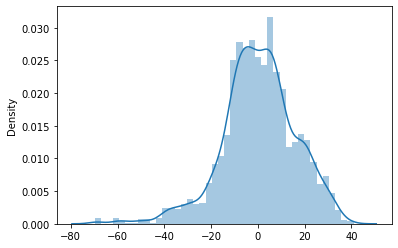

In [38]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [39]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.117294527005019
MSE: 251.03172964112733
RMSE: 15.843980864704656


In [40]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [41]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\asehg\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4532167.712455869, tolerance: 2529.9556965945617
  positive)
C:\Users\asehg\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4461039.870089274, tolerance: 2547.0380710286645
  positive)
C:\Users\asehg\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4656314.616114813, tolerance: 2667.8126904366454
  positive)
C:\Users\asehg\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

{'alpha': 1}
-320.82214916809124


In [42]:
prediction1 =lasso_regressor.predict(X_test)

C:\Users\asehg\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

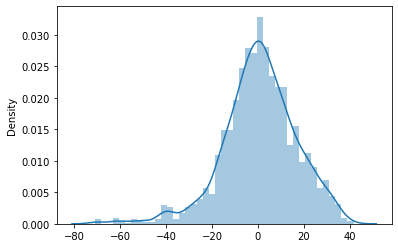

In [43]:
import seaborn as sns
sns.distplot(y_test-prediction1)

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction1))
print('MSE:', metrics.mean_squared_error(y_test, prediction1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction1)))

MAE: 12.213583996827493
MSE: 262.36538279606964
RMSE: 16.19769683615759
